# Experiment 1 Data

In [78]:
import json; import re; import ast; import pandas as pd; from datetime import datetime; import time; import hypertools as hyp
import numpy as np; from matplotlib import pyplot as plt; import os; from matplotlib import patches as patches; import seaborn as sb
import warnings; import scipy; import pickle; import statsmodels.api as sm; import statsmodels.formula.api as smf
from statsmodels.formula.api import ols; import pingouin; from itertools import combinations
from analysis_helpers import *; import mord
warnings.filterwarnings('ignore')
%matplotlib inline
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


# Horizontal gaze shift towards image

In [13]:
# with open("/Users/kirstenziman/Desktop/partials/36_partial.pkl",'rb') as fp:
#     pick = pickle.load(fp)
    
# pick[0]

In [15]:
with open("/Users/kirstenziman/Desktop/new_place/attention-memory-task/Experiment1_BlockCue/code/parsed_data/subs.p",'rb') as fp:
    subs = pickle.load(fp)
    
#subs_df['Subject'].unique()

In [16]:
subs_df = pd.concat(subs)
h = subs_df.groupby(['Subject','Trial'], as_index=False).mean()
h[h['Subject']==8]

#subs_df[['Cued Category','Trial','Run','Subject']]

,Subject,Trial,Attention Button,Attention Reaction Time (s),Cue Validity,Familiarity Rating,Familiarity Reaction Time (s),Post Invalid Cue,Pre Invalid Cue,Rating History,...,av_x_coord,av_y_coord,fix,state,time,timestamp,xRaw_lefteye,xRaw_righteye,yRaw_lefteye,yRaw_righteye
30,8,0.0,2.25,0.803189,1.000,NaN,NaN,NaN,NaN,NaN,...,32.847057,21.185635,0.534902,7.0,8.978468e+08,1.551381e+09,1002.535216,1247.323423,708.826258,743.903011
31,8,1.0,2.25,1.367990,0.875,NaN,NaN,NaN,NaN,NaN,...,31.387294,20.479514,0.799126,7.0,8.978545e+08,1.551381e+09,998.007642,1151.864563,701.347918,702.961625
32,8,2.0,1.25,0.658969,0.875,NaN,NaN,NaN,NaN,NaN,...,31.149700,20.956981,0.724932,7.0,8.978623e+08,1.551381e+09,979.718173,1153.879988,717.245999,719.804157
33,8,3.0,1.75,0.690245,0.875,NaN,NaN,NaN,NaN,NaN,...,31.570902,20.856967,0.739479,7.0,8.978702e+08,1.551381e+09,982.253133,1180.195238,709.579411,720.612614
34,8,4.0,2.00,0.722171,0.875,NaN,NaN,NaN,NaN,NaN,...,30.864677,21.152399,0.770961,7.0,8.978779e+08,1.551381e+09,967.830524,1146.245032,728.740550,721.709685
35,8,5.0,2.25,0.651261,0.625,NaN,NaN,NaN,NaN,NaN,...,31.195948,21.172420,0.795921,7.0,8.978859e+08,1.551381e+09,981.958372,1154.807574,725.421974,726.401079
36,8,6.0,2.50,0.680885,1.000,NaN,NaN,NaN,NaN,NaN,...,31.202838,21.192541,0.763225,7.0,8.978939e+08,1.551381e+09,978.509734,1158.728155,722.668540,730.534239
37,8,7.0,2.00,0.774474,0.875,NaN,NaN,NaN,NaN,NaN,...,31.063032,21.112907,0.860672,7.0,8.979018e+08,1.551381e+09,982.589979,1145.071904,720.874542,726.867662
38,8,8.0,1.75,0.681146,1.000,NaN,NaN,NaN,NaN,NaN,...,30.843685,21.622250,0.740557,7.0,8.979098e+08,1.551381e+09,955.260907,1157.376793,738.098174,744.570406
39,8,9.0,1.75,0.908099,1.000,NaN,NaN,NaN,NaN,NaN,...,31.109308,21.376733,0.811532,7.0,8.979179e+08,1.551381e+09,976.900721,1153.930838,725.677010,740.156133


In [17]:
subs_df['scaled_x_coord'] = (subs_df['av_x_coord']- (59.8/2.0))/(59.8/2.0)
min(subs_df['scaled_x_coord'])

-0.7098527832031251

In [18]:
subs_df.loc[subs_df['Cued Side']=='<','scaled_x_coord'] = abs(subs_df[subs_df['Cued Side']=='<']['scaled_x_coord'])
subs_df.loc[subs_df['Attention Level']=='Category','scaled_x_coord'] = -subs_df[subs_df['Attention Level']=='Category']['scaled_x_coord']
subs_df.loc[subs_df['Attention Level']=='None','scaled_x_coord'] = -subs_df[subs_df['Attention Level']=='None']['scaled_x_coord']

In [19]:
len(subs_df['Subject'].unique())

30

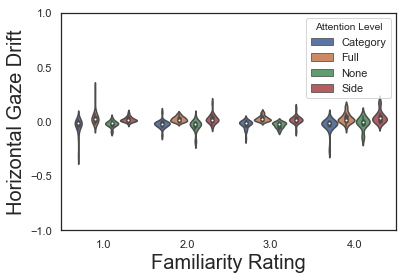

In [20]:
sb.set_style('white')

f = sb.violinplot(x='Familiarity Rating', y='scaled_x_coord', 
              hue='Attention Level', 
              data=subs_df[subs_df['Attention Level']!='Novel'].groupby(['Subject','Familiarity Rating','Attention Level'],
                                  as_index=False).mean())

plt.grid(False)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.xlabel('Familiarity Rating',    fontsize = 20)
plt.ylabel('Horizontal Gaze Drift', fontsize = 20)
f.set(ylim=(-1, 1))
plt.savefig('av_x_gaze.pdf')

In [21]:
subs_df.groupby(['Subject']).mean()

,Attention Button,Attention Reaction Time (s),Cue Validity,Familiarity Rating,Familiarity Reaction Time (s),Post Invalid Cue,Pre Invalid Cue,Rating History,Run,Stimulus End,...,av_y_coord,fix,state,time,timestamp,xRaw_lefteye,xRaw_righteye,yRaw_lefteye,yRaw_righteye,scaled_x_coord
Subject,,,,,,,,,,,,,,,,,,,,,
0,1.843750,0.944976,0.921875,1.602524,0.678481,NaN,NaN,NaN,3.536458,1.537894e+09,...,16.325933,0.940597,7.0,2.883481e+08,1.550772e+09,1037.825080,1004.886601,560.125274,559.367250,0.002800
2,1.987342,0.618359,0.898734,2.156352,1.231678,NaN,NaN,NaN,3.503759,1.537987e+09,...,19.329472,0.295109,7.0,2.970078e+08,1.550780e+09,970.086680,1142.874348,689.739705,635.709789,0.015569
6,NaN,NaN,NaN,1.570492,0.860375,NaN,NaN,NaN,3.500000,1.538150e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2.063291,0.970825,0.898734,1.911950,1.047963,NaN,NaN,NaN,3.506266,1.538574e+09,...,17.031413,0.898381,7.0,8.888161e+08,1.551372e+09,1022.484650,1039.941641,587.764606,580.103705,0.002189
8,1.975000,0.793843,0.900000,2.364780,0.968428,NaN,NaN,NaN,3.500000,1.538578e+09,...,21.110835,0.754131,7.0,8.978821e+08,1.551381e+09,980.556440,1164.942351,719.848038,727.752061,0.016552
9,NaN,NaN,NaN,1.894904,1.307672,NaN,NaN,NaN,3.500000,1.538582e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,2.000000,0.754689,0.900000,1.635484,1.001491,NaN,NaN,NaN,3.461538,1.538593e+09,...,17.093454,0.966525,7.0,6.873278e+06,1.553711e+09,1005.371077,1026.896073,595.138714,576.983837,-0.000904
11,NaN,NaN,NaN,1.596215,0.841078,NaN,NaN,NaN,3.500000,1.538597e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,1.971429,0.816287,0.914286,1.440514,0.870925,NaN,NaN,NaN,3.589744,1.539179e+09,...,16.888524,0.742284,7.0,1.113935e+07,1.553716e+09,1027.766007,1037.171612,586.747017,571.323169,0.009402


# Add gaze ANOVA and regression, here

# Add Gaze Restricted Analysis here

# ~~~~~ Extras ~~~~~ 

In [25]:
with open("/Users/kirstenziman/Desktop/new_place/attention-memory-task/Experiment1_BlockCue/code/parsed_data/behavioral_data.pkl",'rb') as fp:
    df_list = pickle.load(fp)
    
av_x = pd.DataFrame.from_csv('/Users/kirstenziman/Desktop/new_place/attention-memory-task/Experiment1_BlockCue/code/parsed_data/av_x_and_sub_info.csv')

In [26]:
av_x['Subject'].unique()

array(['8_', '1_', '12', '4_', '7_', '14', '2_', '13', '5_', '0_', '32',
       '3_', '10', 10], dtype=object)

In [27]:
sub_list = list(df_list['Subject'].unique())

In [28]:
sub_list.sort()
sub_list

[0,
 2,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 30,
 31,
 32,
 33,
 34,
 36]

In [29]:
av_x['Subject'].unique()

array(['8_', '1_', '12', '4_', '7_', '14', '2_', '13', '5_', '0_', '32',
       '3_', '10', 10], dtype=object)

# Full Violin and ROC

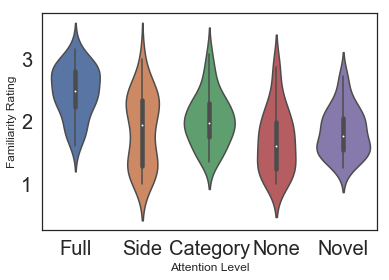

In [30]:
sb.violinplot(x='Attention Level', y='Familiarity Rating', 
              data = df_list.groupby(['Subject','Attention Level'],as_index=False).mean(),
             order = ['Full','Side','Category','None','Novel'])

# insert ttest bars and test

# insert pingouin


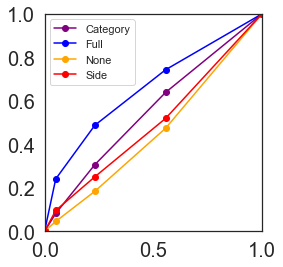

Full AUC: 0.6583234520612545
Category AUC: 0.5541807431190772
Side AUC: 0.4957221974044736
None AUC: 0.4556036487415198


In [16]:
ROC_full = ROC_data(df_list)[0]
ROC_plot(ROC_full)

for attn in ['Full','Category','Side','None']:
    print(attn + ' AUC: ' + str(AUC(ROC_full['Novel'], ROC_full[attn])))

# Category Violin and ROC

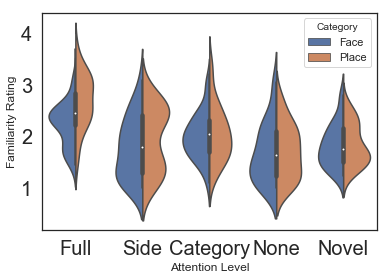

In [17]:
sb.violinplot(x='Attention Level', y='Familiarity Rating', 
              data = df_list.groupby(['Subject','Attention Level','Category'],as_index=False).mean(),
             order = ['Full','Side','Category','None','Novel'],
             hue='Category', split=True)

# insert ttest bars and test

# insert pingouin


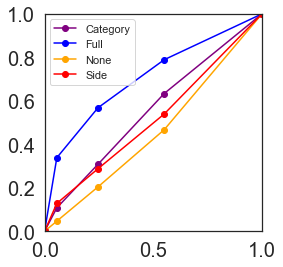

Full AUC: 0.7076886882677518
Category AUC: 0.5556073162269521
Side AUC: 0.5165876106637028
None AUC: 0.45826751214860395


In [18]:
ROC_place = ROC_data(df_list)[2]
ROC_plot(ROC_place)

for attn in ['Full','Category','Side','None']:
    print(attn + ' AUC: ' + str(AUC(ROC_full['Novel'], ROC_place[attn])))

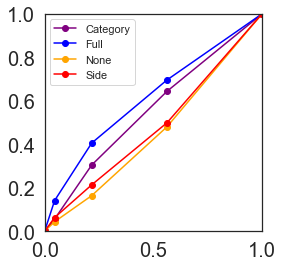

Full AUC: 0.7109666917323914
Category AUC: 0.5579367245366295
Side AUC: 0.5179750501813573
None AUC: 0.45924471406587736


In [19]:
ROC_face = ROC_data(df_list)[1]
ROC_plot(ROC_face)

for attn in ['Full','Category','Side','None']:
    print(attn + ' AUC: ' + str(AUC(ROC_face['Novel'], ROC_place[attn])))

# Task Efficacy

# Novel Cued and Uncued Category

In [20]:
# insert here


# Reaction Time (Attn Probe)

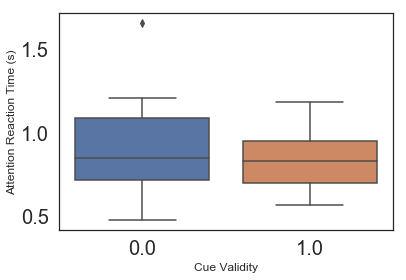

In [21]:
sb.boxplot(x = 'Cue Validity', y = 'Attention Reaction Time (s)', 
              data = df_list.groupby(['Subject','Cue Validity'], as_index=False).mean() )

# add significance markers

# Gaze Check

# Gaze Plot

In [22]:
# eye_data = eye_read('/Users/kirstenziman/Documents/attention-memory-task/data/','eye_data_exp1.pkl')

In [23]:
with open('/Users/kirstenziman/Documents/github/attention-memory-task/code/analysis/eye_data_exp1.pkl','rb') as fp:
    eye_data_exp1 = pickle.load(fp)
    
eye_data_exp1 = eye_data_exp1[eye_data_exp1['av_x_coord']<59.8]
eye_data_exp1['Subject'] = eye_data_exp1['Subject'].map(lambda x: x.replace('_',''))

In [24]:
len(list(df_list['Subject'].unique()))

30

In [31]:
tr = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]*8*30
df_list['Trial']=np.nan
df_list.loc[df_list['Trial Type']=='Presentation','Trial']=tr
df_list.head()

,Unnamed: 0,Subject,Trial Type,Run,Cued Composite,Uncued Composite,Cued Face,Cued Place,Uncued Face,Uncued Place,...,Attention Level,Cue Validity,Post Invalid Cue,Pre Invalid Cue,Attention Button,Rating History,Stimulus Onset,Stimulus End,Attention Probe,Trial
0,150,10,Presentation,3,00926960627Fa_sunapqwoeotxshkukbh.jpg,00076931230fa_sunaafewhewbxmjiurz.jpg,00926960627Fa.jpg,sunapqwoeotxshkukbh.jpg,00076931230fa.jpg,sunaafewhewbxmjiurz.jpg,...,NaN,1.0,NaN,NaN,1.0,NaN,1.538592e+09,1.538592e+09,x,0.0
1,151,10,Presentation,3,00725941201fa_sunaefgzwiramypjvtd.jpg,00828940307fa_sunahuynahneraqftyz.jpg,00725941201fa.jpg,sunaefgzwiramypjvtd.jpg,00828940307fa.jpg,sunahuynahneraqftyz.jpg,...,NaN,0.0,NaN,NaN,3.0,NaN,1.538592e+09,1.538592e+09,o,1.0
2,152,10,Presentation,3,00089931230fa_sunaagcpoejbuzyvddd.jpg,00730960620fa_sunaekgzpfilgjxpeyq.jpg,00089931230fa.jpg,sunaagcpoejbuzyvddd.jpg,00730960620fa.jpg,sunaekgzpfilgjxpeyq.jpg,...,NaN,1.0,NaN,NaN,1.0,NaN,1.538592e+09,1.538592e+09,x,2.0
3,153,10,Presentation,3,00978960627fa_sunbddbivbptlrlauhy.jpg,00265940128fb_sunabkmdplkdbvxriff.jpg,00978960627fa.jpg,sunbddbivbptlrlauhy.jpg,00265940128fb.jpg,sunabkmdplkdbvxriff.jpg,...,NaN,1.0,NaN,NaN,3.0,NaN,1.538592e+09,1.538592e+09,o,3.0
4,154,10,Presentation,3,00937960627fa_sunaqsolmfydodnakub.jpg,00788941205fa_sunagountlxpzkytsmp.jpg,00937960627fa.jpg,sunaqsolmfydodnakub.jpg,00788941205fa.jpg,sunagountlxpzkytsmp.jpg,...,NaN,1.0,NaN,NaN,1.0,NaN,1.538592e+09,1.538592e+09,x,4.0


In [32]:
grouped_eye = eye_data_exp1.groupby(['Subject','Run','Trial'], as_index=False).mean()

grouped_eye['Subject'] = pd.to_numeric(grouped_eye['Subject'])
grouped_eye['Run']     = pd.to_numeric(grouped_eye['Run'])
grouped_eye['Trial']   = pd.to_numeric(grouped_eye['Trial'])


merged_pres = grouped_eye.merge(df_list, on=['Subject', 'Run', 'Trial'])

NameError: name 'eye_data_exp1' is not defined

In [33]:
# merged_pres

In [34]:
def add_gaze(df):
    '''
    input: df containing pres and mem from single run
    output: df with string in 'Attention Level' column in each Memory trial row
    '''

    for index,row in df.iterrows():
        if row['Trial Type']=='Memory':
            mem_image = row['Memory Image']
            for cue in ['Cued ', 'Uncued ']:
                for cat in ['Face', 'Place']:
                    if df.loc[df[cue+cat] == mem_image].shape[0]!=0:
                        df['av_x_coord'][index]=df.loc[df[cue+cat] == mem_image]['av_x_coord']  
                        df['Cued Side'][index] = df.loc[df[cue+cat] == mem_image]['Cued Side'].item()  

    mem_mask = df['Trial Type']=='Memory'
    df.loc[mem_mask,'av_x_coord'] = df.loc[mem_mask,'av_x_coord'].fillna(np.nan)

    return(df)

In [35]:
# merged_pres[merged_pres['Trial Type']=='Presentation']

combine = pd.concat([merged_pres, df_list[df_list['Trial Type']=='Memory']])

NameError: name 'merged_pres' is not defined

In [36]:
# subs = []

# for sub in combine['Subject'].unique():
#     print(sub)
#     subs.append(add_gaze(combine[combine['Subject']==sub]))

In [37]:
# pickle.dump(subs, open("subs.p", "wb" ))

with open("/Users/kirstenziman/Desktop/new_place/attention-memory-task/Experiment1_BlockCue/code/parsed_data/subs.p",'rb') as fp:
    subs = pickle.load(fp)

In [38]:
subs_df = pd.concat(subs)

In [39]:
subs_df.groupby(['Subject'], as_index=False).mean()

,Subject,Attention Button,Attention Reaction Time (s),Cue Validity,Familiarity Rating,Familiarity Reaction Time (s),Post Invalid Cue,Pre Invalid Cue,Rating History,Run,...,av_x_coord,av_y_coord,fix,state,time,timestamp,xRaw_lefteye,xRaw_righteye,yRaw_lefteye,yRaw_righteye
0,0,1.843750,0.944976,0.921875,1.602524,0.678481,NaN,NaN,NaN,3.536458,...,29.805907,16.325933,0.940597,7.0,2.883481e+08,1.550772e+09,1037.825080,1004.886601,560.125274,559.367250
1,2,1.987342,0.618359,0.898734,2.156352,1.231678,NaN,NaN,NaN,3.503759,...,30.928566,19.329472,0.295109,7.0,2.970078e+08,1.550780e+09,970.086680,1142.874348,689.739705,635.709789
2,6,NaN,NaN,NaN,1.570492,0.860375,NaN,NaN,NaN,3.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7,2.063291,0.970825,0.898734,1.911950,1.047963,NaN,NaN,NaN,3.506266,...,30.123191,17.031413,0.898381,7.0,8.888161e+08,1.551372e+09,1022.484650,1039.941641,587.764606,580.103705
4,8,1.975000,0.793843,0.900000,2.364780,0.968428,NaN,NaN,NaN,3.500000,...,31.370273,21.110835,0.754131,7.0,8.978821e+08,1.551381e+09,980.556440,1164.942351,719.848038,727.752061
5,9,NaN,NaN,NaN,1.894904,1.307672,NaN,NaN,NaN,3.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,10,2.000000,0.754689,0.900000,1.635484,1.001491,NaN,NaN,NaN,3.461538,...,29.614275,17.093454,0.966525,7.0,6.873278e+06,1.553711e+09,1005.371077,1026.896073,595.138714,576.983837
7,11,NaN,NaN,NaN,1.596215,0.841078,NaN,NaN,NaN,3.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,12,1.971429,0.816287,0.914286,1.440514,0.870925,NaN,NaN,NaN,3.589744,...,30.062209,16.888524,0.742284,7.0,1.113935e+07,1.553716e+09,1027.766007,1037.171612,586.747017,571.323169
9,13,1.980392,0.757389,0.921569,1.882353,1.128550,NaN,NaN,NaN,3.652291,...,29.327008,19.033370,0.352920,7.0,1.742254e+08,1.553879e+09,976.474955,1070.313319,663.307433,641.837914


In [34]:
subs_df = pd.concat(subs)
subs_df[subs_df['Trial Type']=='Memory'].head()
subs_df[['Cued Category','Trial','Run','Subject']]

,Cued Category,Trial,Run,Subject
0,Face,0.0,1,0
1,Face,1.0,1,0
2,Face,2.0,1,0
3,Face,3.0,1,0
4,Face,4.0,1,0
5,Face,5.0,1,0
6,Face,6.0,1,0
7,Face,7.0,1,0
8,Face,8.0,1,0
9,Face,9.0,1,0


# Gaze ANOVA

In [40]:
subs_df['scaled_x_coord'] = (subs_df['av_x_coord']- (59.8/2.0))/(59.8/2.0)
min(subs_df['scaled_x_coord'])

-0.7098527832031251

In [41]:
subs_df.loc[subs_df['Cued Side']=='<','scaled_x_coord'] = abs(subs_df[subs_df['Cued Side']=='<']['scaled_x_coord'])
subs_df.loc[subs_df['Attention Level']=='Category','scaled_x_coord'] = -subs_df[subs_df['Attention Level']=='Category']['scaled_x_coord']
subs_df.loc[subs_df['Attention Level']=='None','scaled_x_coord'] = -subs_df[subs_df['Attention Level']=='None']['scaled_x_coord']

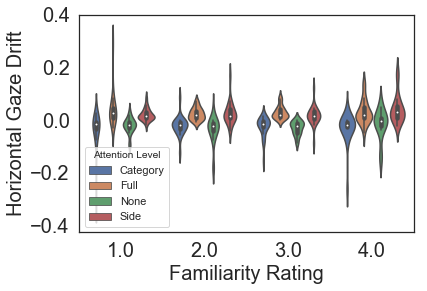

In [42]:
sb.set_style('white')

f = sb.violinplot(x='Familiarity Rating', y='scaled_x_coord', 
              hue='Attention Level', 
              data=subs_df[subs_df['Attention Level']!='Novel'].groupby(['Subject','Familiarity Rating','Attention Level'],
                                  as_index=False).mean())

plt.grid(False)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.xlabel('Familiarity Rating',    fontsize = 20)
plt.ylabel('Horizontal Gaze Drift', fontsize = 20)
#f.set(ylim=(-1, 1))
plt.savefig('av_x_gaze.pdf')



# Gaze Regression

In [43]:
subs_df['Subject'].unique()


array([ 0, 10, 12, 13, 14, 15, 16, 17, 18, 19,  2, 20, 21, 22, 23, 24, 25,
       26, 27, 32, 33, 34,  7,  8, 31,  6, 36, 30,  9, 11])

In [44]:
subs_df['FamiliarityRating'] = subs_df['Familiarity Rating']

d=[]
for subject in subs_df['Subject'].unique(): 
    
    sub=[]
    data = subs_df[subs_df['Subject']==subject]
    reg = smf.ols(formula = "FamiliarityRating ~ scaled_x_coord", data = data).fit()
    d.append(pd.concat([data, pd.DataFrame({'gaze_resid':reg.resid})], axis=1, sort=False))
    
gaze_reg = pd.concat(d)

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

# +/- 1 Gaze Limited

In [45]:
# start with eye_data_exp1
# find subs, run, trials where no gaze outside 1 right or left

# pull these from subs_df

In [46]:
# eye_data_exp1['Subject']

### Load Gaze Data

# Gaze ANOVA

In [47]:
#eye_data = eye_read('/Users/kirstenziman/Documents/attention-memory-task/data/','eye_data_exp1.pkl')

In [48]:
#eye_data = eye_data[eye_data['av_x_coord']<=59.8]

In [49]:
#eye_data[eye_data['av_x_coord']>]

In [50]:
# gaze_dat = pd.DataFrame.from_csv('gaze_reg_exp1_no_novel_subtraction.csv')

In [51]:
# sb.violinplot(x='Familiarity Rating', y='')

# Gaze Regression

In [52]:
gaze = pd.DataFrame.from_csv('av_x_and_sub_info.csv')

FileNotFoundError: File b'av_x_and_sub_info.csv' does not exist

In [77]:
def add_gaze(df):
    
    '''
    input: df containing pres and mem from single run
    output: df with string in 'Attention Level' column in each Memory trial row
    '''
    
    for index,row in df.iterrows():
        if row['Trial Type']=='Memory':
            mem_image = row['Memory Image']
            for cue in ['Cued ', 'Uncued ']:
                for cat in ['Face', 'Place']:
                    if df.loc[df[cue+cat] == mem_image].shape[0]!=0:
                        df['av_x_coord'][index]=df.loc[df[cue+cat] == mem_image]['av_x_coord']  
                        df['Cued Side'][index] = df.loc[df[cue+cat] == mem_image]['Cued Side'].item()  

    mem_mask = df['Trial Type']=='Memory'
    df.loc[mem_mask,'av_x_coord'] = df.loc[mem_mask,'av_x_coord'].fillna(np.nan)

    return(df)

In [66]:
full = pd.DataFrame.from_csv('/Users/kirstenziman/Desktop/new_place/attention-memory-task/Experiment1_BlockCue/code/parsed_data/full_score_gaze_and_novel.csv')

# FULL HAS ALL SUBJECTS

In [76]:
full.groupby(['Subject'], as_index=False).mean()['av_x_coord'] # .columns   # [full['Subject']==36]['av_x_coord'].mean()

0     3295.855616
1       31.010089
2       29.810189
3       28.148911
4       29.663953
5       27.133075
6       29.779641
7       41.633484
8       28.116348
9       28.234795
10      28.303861
11      29.976519
12      29.823178
13      33.502873
14      31.865019
15      28.618064
16      28.112613
17      27.875609
18      28.532839
19      28.464955
20      28.369339
21      27.540288
22      28.147931
23      30.183639
24      28.401720
25      27.746626
26      27.809107
27      28.510600
28      28.466901
29      30.484673
Name: av_x_coord, dtype: float64

In [62]:
full.loc[full['Subject'] == 0, 'av_x_coord'] = (59.8/2048) * full.loc[full['Subject'] == 0]['av_x_coord']

# df['av_x_coord'] = (59.8/2048)*(df[['xRaw_righteye', 'xRaw_lefteye']].mean(axis=1))
# df['av_y_coord'] = (33.6/1152)*(df[['yRaw_righteye', 'yRaw_lefteye']].mean(axis=1))

In [63]:
full[full['Subject']==0]['av_x_coord'].mean()

96.23640911381696

In [64]:
# full[full['Subject']==0]['av_x_coord']

In [69]:
59.8/2

29.9

In [73]:
full['Subject']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
5         0.0
6         0.0
7         0.0
8         0.0
9         0.0
10720     0.0
10721     0.0
10722     0.0
10723     0.0
10724     0.0
10725     0.0
10726     0.0
10727     0.0
10728     0.0
10729     0.0
10730     0.0
10731     0.0
10732     0.0
10733     0.0
10734     0.0
10735     0.0
10736     0.0
10737     0.0
10738     0.0
10739     0.0
         ... 
5021     36.0
5022     36.0
5023     36.0
5024     36.0
5025     36.0
5026     36.0
5027     36.0
5028     36.0
5029     36.0
5030     36.0
5031     36.0
5032     36.0
5033     36.0
5034     36.0
5035     36.0
5036     36.0
5037     36.0
5038     36.0
5039     36.0
5040     36.0
5041     36.0
5042     36.0
5043     36.0
5044     36.0
5045     36.0
5046     36.0
5047     36.0
5048     36.0
5049     36.0
5050     36.0
Name: Subject, Length: 12000, dtype: float64